In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [198]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [199]:
print(train_df.shape)
#check first 5 rows of data
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
#check the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [201]:
#we don't need PassengerId, Name, Ticket, Cabin, Fare
#We will drop Age as well as it contains missing values
train_df = train_df.drop(['PassengerId','Name','Ticket','Cabin','Age', 'Fare'], axis=1)
test_df = test_df.drop(['PassengerId','Name','Ticket','Cabin','Age', 'Fare'], axis=1)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

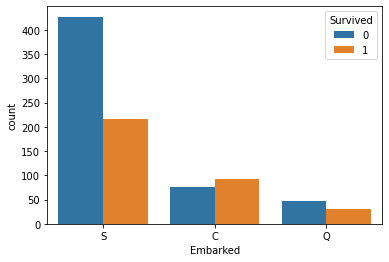

In [202]:
#let's see what impact Embarked has on survival
sns.countplot(x='Embarked', data=train_df, hue='Survived')

In [203]:
#Very useful. We will keep this feature in our model
#get dummy variables for Embarked
dummies_embarked_train = pd.get_dummies(train_df['Embarked'], prefix='Embarked')
dummies_embarked_test = pd.get_dummies(test_df['Embarked'], prefix='Embarked')

<AxesSubplot:xlabel='Sex', ylabel='count'>

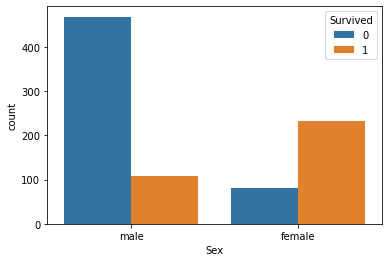

In [204]:
#how about Sex
sns.countplot(x='Sex', data = train_df, hue='Survived')

In [205]:
#very useful feature. We will keep it. 
#get dummies
dummies_sex_train = pd.get_dummies(train_df['Sex'], prefix='Sex')
dummies_sex_test = pd.get_dummies(test_df['Sex'], prefix='Sex')

In [206]:
#As we have dummies for Sex and Embarked columns, we don't need them anymore
train_df.drop(['Sex', 'Embarked'], inplace=True, axis=1)
test_df.drop(['Sex', 'Embarked'], inplace=True, axis=1)

In [207]:
train = pd.concat([train_df, dummies_sex_train, dummies_embarked_train], axis=1)
test = pd.concat([test_df, dummies_sex_test, dummies_embarked_test], axis=1)

In [208]:
X_train, X_test = train.drop(['Survived'], axis=1).values, test.values
y_train = train['Survived'].values
y_test = pd.read_csv('data/gender_submission.csv')['Survived'].values

In [209]:
#create list of calssification algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [210]:
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC()
gp = GaussianProcessClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
ab = AdaBoostClassifier()
gnb = GaussianNB()
xgb = xgb.XGBClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500)

In [211]:
#model list
models = [knn, svm, gp, dt, rf, ab, gnb, xgb, mlp]

In [212]:
#create list of names of models
names = ['KNN', 'SVM', 'GP', 'DT', 'RF', 'AB', 'GNB', 'XGB', 'MLP']

In [213]:
#train models
for i in range(len(models)):
    model = models[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy of ' + names[i] + ': ' + str(np.mean(y_pred == y_test)))

Accuracy of KNN: 0.9282296650717703
Accuracy of SVM: 0.9856459330143541
Accuracy of GP: 0.916267942583732
Accuracy of DT: 0.8660287081339713
Accuracy of RF: 0.8660287081339713
Accuracy of AB: 0.9641148325358851
Accuracy of GNB: 0.9258373205741627
Accuracy of XGB: 0.868421052631579
Accuracy of MLP: 0.8851674641148325


In [214]:
#classification report
from sklearn.metrics import classification_report

In [221]:
#classification report for each model
scores = dict()
for i in range(len(models)):
    model = models[i]
    y_pred = model.predict(X_test)
    print(names[i])
    print(classification_report(y_test, y_pred))
    print('\n')
    scores[names[i]] = model.score(X_test, y_test)

KNN
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       266
           1       0.90      0.91      0.90       152

    accuracy                           0.93       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



SVM
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       266
           1       1.00      0.96      0.98       152

    accuracy                           0.99       418
   macro avg       0.99      0.98      0.98       418
weighted avg       0.99      0.99      0.99       418



GP
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       266
           1       0.87      0.90      0.89       152

    accuracy                           0.92       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.92      0.92      0.92       418



DT

In [225]:
#sort scores
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
for i in range(len(sorted_scores)):
    print(sorted_scores[i][0] + ': ' + str(sorted_scores[i][1]))

SVM: 0.9856459330143541
AB: 0.9641148325358851
KNN: 0.9282296650717703
GNB: 0.9258373205741627
GP: 0.916267942583732
MLP: 0.8851674641148325
XGB: 0.868421052631579
DT: 0.8660287081339713
RF: 0.8660287081339713


In [254]:
#SVM is the best model. Let's use it
#export the test result as csv
y_pred = svm.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Survived']


In [255]:
submission_orig = pd.read_csv('data/gender_submission.csv')

In [256]:
ids = pd.DataFrame(submission_orig['PassengerId'])

In [257]:
submission_mine = pd.concat([ids,y_pred], axis=1)

In [258]:
submission_mine.to_csv('submission.csv', index=None)

In [259]:
submission_mine

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1]:
import pycaret

In [2]:
pycaret.__version__

'2.3.10'